Karen Alderete Romo
Assignment 1 – Using NLTK and Vader
Sentiment Analysis

In [61]:
!pip install nltk PyPDF2 py-readability-metrics wordcloud


In [35]:
import nltk
import PyPDF2
import os
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [41]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

In [37]:
nltk.download('punkt')        # Tokenizer
nltk.download('stopwords')    # Commonly used words to remove
nltk.download('vader_lexicon')  # Sentiment analysis lexicon

[nltk_data] Downloading package punkt to C:\Users\Karen
[nltk_data]     Alderete\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Karen
[nltk_data]     Alderete\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Karen
[nltk_data]     Alderete\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The two news articles discuss the allegations of plagiarism against Claudine Gay, the President of Harvard University.
The controversy comes from claims that parts of her academic work included uncredited material/inadequate citation, raising questions about her qualifications and integrity. In response, Gay has agreed to make edits to her dissertation/academic writings. However, while Reuters and Fox News report on the same issue, they take different approaches in how they present the story.

Reuters’ Approach: I believe the Reuters article follows a more traditional news-reporting approach, presenting the facts in a structured and neutral manner.
The focus is primarily on the sequence of events, Gay’s response, and official statements from Harvard. The language is more objective. Also, the language is “less emotionally charged" and as it relies on official statements, it avoids speculation. It is more straightforward.

Fox News’ Approach: On the other hand, the Fox News article presents the same facts but uses stronger wording, particularly in emphasizing the seriousness of the allegations. The language is slightly more assertive, and the framing leans toward the impact of the accusations rather than just reporting them. In other words, I think the article focuses more on the controversy and criticism rather than just the sequence of events. Also, I believe it takes a more skeptical tone toward Gay’s response, which makes it feel more opinionated.

Let's see an example:

Reuters:
"Harvard University’s president was planning to submit three corrections to her 1997 dissertation after a committee investigating plagiarism allegations against her found that she had made citation errors, a university spokesperson said."
This wording presents just the facts, citing a Harvard spokesperson.

Fox News:
"Embattled Harvard University President Claudine Gay has been slapped with additional charges of plagiarism. The Washington Free Beacon reported Harvard ‘received a complaint outlining over 40 allegations of plagiarism’ against Gay..."

Here, the narrative implies severity and controversy. Also, Fox News highlights the scale of the allegations (40+ complaints), reinforcing the gravity of the situation. Moreover, it quotes The Washington Free Beacon, showing that it relies heavily on external conservative sources to reinforce its framing of the issue.

My impression is that while Reuters presents the story in a straightforward way, leaving room for readers to interpret the implications without editorial guidance, Fox News chooses to emphasize the scandal aspect in a more evident manner, which may lead readers to focus more on the backlash rather than just the response from Gay and Harvard. I am not saying that the articles are biased, but they definitely present the content in a different way. This is a good example of how media framing can shape public perception, even when reporting on the same facts. So yes, word choice, tone, and framing, matter a lot.

In [83]:
# Extract text from both PDFs
reuters_text = extract_text_from_pdf("reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf")
foxnews_text = extract_text_from_pdf("foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf")

# Display first 500 characters
print("Reuters:", reuters_text[:500])
print("\nFox News:", foxnews_text[:500])


Reuters: 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Ri

Fox News: 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on t

Indeed the text extraction process using PyPDF2 has some anomalies. There are formatting issues. For example, the extracted text contains unexpected line breaks and missing spaces (e.g.,"Gabriella BorterHarvard" missing space between "Borter" and "Harvard"). Moreover, some URLs are extracted as text within the content, which might not be relevant to the analysis (e.g., "reuters.com/world/us/..."). Also,there are random numbers such as "1 / 3" and "1 / 5" at the start of the articles. These may be artifacts from the PDF structure (page numbering or metadata). I also notice extra words and symbols that might be extract portions of page headers(e.g.,Emba at the end of the Fox News extract).

In [120]:
# Tokenize sentences and words
reuters_sentences = sent_tokenize(reuters_text)
reuters_words = word_tokenize(reuters_text)

foxnews_sentences = sent_tokenize(foxnews_text)
foxnews_words = word_tokenize(foxnews_text)

# Display sample tokens
print("Sample Reuters Sentences:", reuters_sentences[:3])
print("Sample Fox News Sentences:", foxnews_sentences[:3])

Sample Reuters Sentences: ['1 / 3Gabriella BorterHarvard president will submit dissertation edits after\nplagiarism allegations\nreuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21\nHarvard University President Claudine Gay testifies before a House Education and The\nWorkforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting\nAntisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023.', "REUTERS/Ken\nCedeno/File Photo Acquire Licensing Rights\nDec 21 (Reuters) - Harvard University's president was planning to submit three corrections to\nher 1997 dissertation after a committee investigating plagiarism allegations against her found\nthat she had made citation errors, a university spokesperson said.", "Claudine Gay , who was inaugurated as Harvard's president in September , has already\nsubmitted corrections to two published articles in recent weeks that were the focus of a\nreview by the Harvar

In [122]:
stop_words = set(stopwords.words("english"))

reuters_filtered = [word for word in reuters_words if word.lower() not in stop_words]
foxnews_filtered = [word for word in foxnews_words if word.lower() not in stop_words]

print("Filtered Reuters Words:", reuters_filtered[:20])
print("Filtered Fox News Words:", foxnews_filtered[:20])

Filtered Reuters Words: ['1', '/', '3Gabriella', 'BorterHarvard', 'president', 'submit', 'dissertation', 'edits', 'plagiarism', 'allegations', 'reuters.com', '/world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21', 'Harvard', 'University', 'President', 'Claudine', 'Gay', 'testifies', 'House', 'Education']
Filtered Fox News Words: ['1', '/', '5Brian', 'FloodEmbattled', 'Harvard', 'University', 'President', 'Claudine', 'Gay', 'hit', 'plagiarism', 'charges', 'foxnews.com', '/media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges', 'Media', 'Harvard', '‘', 'received', 'complaint', 'outlining']


In [124]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [126]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer() 

In [128]:
# Get sentiment scores for Reuters article
reuters_sentiment = sia.polarity_scores(reuters_text)
print("Reuters Sentiment Scores:", reuters_sentiment)

# Get sentiment scores for Fox News article
foxnews_sentiment = sia.polarity_scores(foxnews_text)
print("Fox News Sentiment Scores:", foxnews_sentiment)

Reuters Sentiment Scores: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}
Fox News Sentiment Scores: {'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}


The Reuters article has a higher neutral score, meaning it presents information in a more factual and objective manner (agree). The Fox News article is mostly neutral too, but it leans a bit more positive and has a strong positive compound score (disagree). In this case of the Fox News article, the sentiment analyzer may be interpreting engagement and strong framing as positive rather than purely critical (Fox News article's tone is more upbeat, using emotionally charged words).

The high negative compound score (-0.9719) in Reuters article was totally unexpected to me, given its objective tone in the narrative. Probably, this score is the result of using formal language, which the sentiment analyzer might be interpreting as negative (certain words may have contributed to a more negative classification, despite the neutral style). 

In summary, I believe the negative compound score for Reuters seems to misrepresent the article’s factual approach, likely because of the use of serious or formal language (e.g.,words like "plagiarism" and "investigation" that are usually linked to negativity). Moreover, I am not surprised of the neutral score as it is mostly fact-based and objective. On the other hand, the highly unexpected positive score for Fox News article may be due to engaging or emotionally charged wording, rather than an actual positive framing of the issue.

Overall, I believe the sentiment analysis tool is not perfect/very accurate as it seems to interpret just certain words rather than the actual intent of the article (the whole narrative)


In [139]:
# Define the headlines
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations"
foxnews_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"

# Get sentiment scores
reuters_headline_sentiment = sia.polarity_scores(reuters_headline)
foxnews_headline_sentiment = sia.polarity_scores(foxnews_headline)

# Print results
print("Reuters Headline Sentiment Scores:", reuters_headline_sentiment)
print("Fox News Headline Sentiment Scores:", foxnews_headline_sentiment)


Reuters Headline Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Fox News Headline Sentiment Scores: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


The Reuters headline is completely neutral with no positive or negative sentiment (factual language). The scores of the Fow News headline are different; words like "embattled", "hit with charges", and "plagiarism" likely contribute to the negative sentiment.

Reuters:
Headline sentiment (Compound): 0.0 , so neutral / Full article sentiment (compound): -0.9719, so negative

Fox News:
Headline sentiment (compound): -0.3353, so slightly negative / Full article sentiment (compound): 0.8346, so positive

The scores do not align. In Reuters article, the headline is completely neutral but the score of the full article sentiment suggests the content is fully negative. On the other hand, while the headline of the Fox News article is slightly negative, the score of the full article sentiment suggests the content is highly positive. It is actually very interesting, because Reuters prioritizes neutrality in its headline, keeping it objective and non-sensational. But when analyzing the full content, the sentiment becomes negative due to the topic rather than bias. And on the other hand, Fox News' headline is emotionally charged, shaping the audience’s perception before they even read the article. 
So, definitely, headlines can misrepresent or oversimplify an article’s tone—a crucial aspect to consider in media literacy.

In [97]:
from readability import Readability

In [142]:
from readability import Readability

# Create Readability objects for each article
r_reuters = Readability(reuters_text)
r_foxnews = Readability(foxnews_text)

# Compute readability scores
print("=== Readability Scores ===\n")

# Reuters Scores
print("Reuters:")
print("Flesch Reading Ease:", r_reuters.flesch().score)
print("Flesch-Kincaid Grade Level:", r_reuters.flesch_kincaid().score)
print("Gunning Fog Index:", r_reuters.gunning_fog().score)

print("\nFox News:")
print("Flesch Reading Ease:", r_foxnews.flesch().score)
print("Flesch-Kincaid Grade Level:", r_foxnews.flesch_kincaid().score)
print("Gunning Fog Index:", r_foxnews.gunning_fog().score)


=== Readability Scores ===

Reuters:
Flesch Reading Ease: 18.384675005023126
Flesch-Kincaid Grade Level: 18.02006831424553
Gunning Fog Index: 18.87116736990155

Fox News:
Flesch Reading Ease: 21.41115320671068
Flesch-Kincaid Grade Level: 19.21912993097889
Gunning Fog Index: 21.868487077434633


To assess the complexity of the two articles, I used 3 different readability metrics: Flesch Reading Ease, Flesch-Kincaid Grade Level, and Gunning Fog Index.

Context:
a) Flesch Reading Ease Score. It is based on sentence length and syllables per word (shorter sentences and simpler words). Measures how easy a text is to read. Higher scores indicate easier readability (e.g., scores around 60–70 are standard for general reading, while scores below 30 suggest difficult academic-level text).
Scale: 0 to 100 (Higher is easier to read)

b) Flesch-Kincaid Grade Level. Converts the readability ease score into an approximate U.S. grade level required to understand the text. A higher score suggests that more education is needed to comprehend the content.
Example Scores:
5.0 → 5th-grade level
8.0 → 8th-grade level
12.0 → 12th-grade level (high school senior)
16.0+ → College+

c)Gunning Fog Index. Estimates the years of formal education a person needs to understand the text. Based on sentence length and complex words.
Example Scores:
8-10 → Standard readability (general public can read it).
12+ → High school graduates should understand.
16+ → College-level difficulty.

Interpretation of the results:
Overall, both articles have very low Flesch Reading Ease scores (below 30), indicating they are difficult to read. The Reuters article has a slightly lower readability score than the Fox News article, meaning it is slightly more challenging to understand (although Reuters generally uses a neutral and structured style, it tends to use longer and more formal sentences compared to Fox News). This affects the Flesch Reading Ease score. Moreover, both articles require college-level reading skills, meaning they are intended for an educated audience. The slightly higher difficulty of the Fox News article suggests that it may use more complex phrasing or a more dramatic tone compared to Reuters, which aligns with previous observations about their reporting styles.

I would say the Reuter's article is in general easier to comprehend because it uses more structured and neutral language and it follows a traditional journalistic style, focusing on facts. Example: "Harvard University President Claudine Gay testifies before a House Education and The Workforce Committee hearing titled 'Holding Campus Leaders Accountable and Confronting Antisemitism' on Capitol Hill in Washington, U.S., December 5, 2023." This sentence is long (also explains the reason why the Flesch Reading ease score was slightly lower) but fact-based, providing essential details without emotional language.


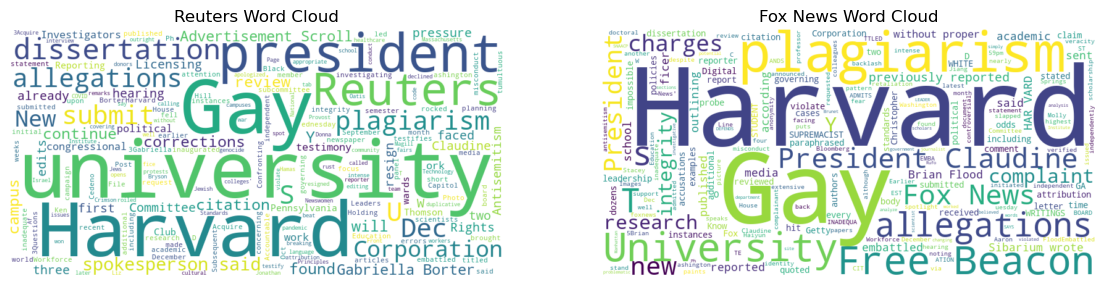

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds for each article
reuters_wc = WordCloud(width=800, height=400, background_color="white").generate(reuters_text)
foxnews_wc = WordCloud(width=800, height=400, background_color="white").generate(foxnews_text)

# Display word clouds
plt.figure(figsize=(14,6))

# Reuters Word Cloud
plt.subplot(1,2,1)
plt.imshow(reuters_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Reuters Word Cloud")

# Fox News Word Cloud
plt.subplot(1,2,2)
plt.imshow(foxnews_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Fox News Word Cloud")

plt.show()


Reuters Word Cloud:
The largest words are "Harvard", "Gay", "university", "president" , "Reuters", and "dissertation." This suggests that Reuters focuses on the institution, the individual involved, and the academic nature of the issue. The word "plagiarism" appears, but it is not the most dominant term. This indicates that Reuters mentions the controversy but does not make it the primary focus. Terms like "Committee," "Congressional," and "investigators" suggest that Reuters references official proceedings and governmental involvement. Again, I can determine that Reuters takes a neutral, fact-driven approach to reporting the news. The emphasis on official processes (submitting corrections, reviewing allegations) rather than the accusations themselves suggests an effort to avoid speculation and keep the article objective. So, I believe that instead of framing the story as a scandal, Reuters presents it as a newsworthy but structured event within academic and institutional processes.

Fox News Word Cloud:
In this case, the largest words are "Harvard", "Gay", "plagiarism", "allegations", "university", and "Fox News", indicating a stronger focus on the accusations. Now, "Free Beacon" appears prominently, this is a conservative news outlet known for investigative journalism. Its large presence suggests that Fox News relied heavily on external conservative sources to reinforce its framing of the issue. The strong presence of emotionally charged words suggests that the article is designed to highlight controversy, possibly reinforcing a narrative. More critical and acusatory. 

So, in summary I would say that the Reuters word cloud is dominated by neutral and academic terms like "Harvard," "Gay," "university," "dissertation," "corrections," and "review." The presence of words like "spokesperson," "statement," and "committee" suggests that Reuters focuses more on official responses and procedural steps rather than framing the issue as a scandal. Fox News is more aggressive in its framing, emphasizing controversy/drama over resolution. Even though both articles report the same facts, the way they emphasize certain words over others significantly shapes public perception.